<a href="https://colab.research.google.com/github/denisbebrovich/ML-DS/blob/main/MO%D0%B4%D0%B71.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импортируем необходимые библиотеки

In [ ]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import PowerTransformer
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Подготовка данных

открываем файл

In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/ML/glassdoor_reviews.csv', delimiter=',', nrows = 100000)
dataframe

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
3,AFH-Wealth-Management,2016-04-16,,Current Employee,NaN,5,2.0,3.0,NaN,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Bloomberg-L-P,2013-05-03,Sales,"Current Employee, more than 3 years","New York, NY",4,4.0,5.0,NaN,3.0,3.0,3.0,v,v,r,Achieved steady state,"Smart and engaged employees, passion for the e...",still some transition/growing pains as it evol...
99996,Bloomberg-L-P,2013-05-04,Help Desk Analyst,"Former Employee, more than 1 year","São Paulo, São Paulo, São Paulo",2,5.0,4.0,NaN,2.0,4.0,2.0,x,r,r,It really depends on if you want to be a playe...,"Initial Salary is attractive, free food and wo...",-The company culture is fine but the Help Desk...
99997,Bloomberg-L-P,2013-05-04,Project Manager,"Current Employee, more than 10 years","Washington, DC",3,3.0,2.0,NaN,4.0,4.0,3.0,x,v,r,They give a lot and they expect a lot,Pay is good\r\nFree food in every building\r\n...,Corporate culture does not seem to promote cro...
99998,Bloomberg-L-P,2013-05-05,Financial Software Developer,"Current Employee, more than 1 year","New York, NY",4,3.0,4.0,NaN,3.0,4.0,4.0,v,v,r,A Good company to start with,"good life-work balance, friendly people",Lack of hands-on experience on most of techniques


выбираем только необходимые столбцы

In [ ]:
needed_columns = [1, 5, 6, 7, 9, 10, 11, 12, 13, 14]
df = dataframe.iloc[:, needed_columns]
df

,date_review,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook
0,2015-04-05,2,4.0,3.0,2.0,3.0,3.0,x,o,r
1,2015-12-11,2,3.0,1.0,2.0,1.0,4.0,x,o,r
2,2016-01-28,1,1.0,1.0,1.0,1.0,1.0,x,o,x
3,2016-04-16,5,2.0,3.0,2.0,2.0,3.0,x,o,r
4,2016-04-23,1,2.0,1.0,2.0,1.0,1.0,x,o,x
...,...,...,...,...,...,...,...,...,...,...
99995,2013-05-03,4,4.0,5.0,3.0,3.0,3.0,v,v,r
99996,2013-05-04,2,5.0,4.0,2.0,4.0,2.0,x,r,r
99997,2013-05-04,3,3.0,2.0,4.0,4.0,3.0,x,v,r
99998,2013-05-05,4,3.0,4.0,3.0,4.0,4.0,v,v,r


посмотрим количество наловых значений

In [ ]:
df.isnull().sum()

,0
date_review,0
overall_rating,0
work_life_balance,15388
culture_values,20732
career_opp,15173
comp_benefits,15409
senior_mgmt,15995
recommend,0
ceo_approv,0
outlook,0


я решил просто дропнуть строки, в которых присутствуют налл значения, потому что у меня и так достаточно большой датасет. мб потом попробую заполнить какие-то наллы

In [ ]:
df = df.dropna().reset_index(drop=True)
len(df)

78152

In [ ]:
df.isnull().sum()

,0
date_review,0
overall_rating,0
work_life_balance,0
culture_values,0
career_opp,0
comp_benefits,0
senior_mgmt,0
recommend,0
ceo_approv,0
outlook,0


почему то не сработало преобразование в int чере iloc :(

In [ ]:
df.fillna(0, inplace=True) #на всякий случай заполняю нулями пропуски чтоб не было ошибки
df.iloc[:, 2 : 7] = df.iloc[:, 2 : 7].round()
df.iloc[:, 2 : 7] = df.iloc[:, 2 : 7].astype(int)
df

,date_review,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook
0,2015-04-05,2,4.0,3.0,2.0,3.0,3.0,x,o,r
1,2015-12-11,2,3.0,1.0,2.0,1.0,4.0,x,o,r
2,2016-01-28,1,1.0,1.0,1.0,1.0,1.0,x,o,x
3,2016-04-16,5,2.0,3.0,2.0,2.0,3.0,x,o,r
4,2016-04-23,1,2.0,1.0,2.0,1.0,1.0,x,o,x
...,...,...,...,...,...,...,...,...,...,...
78147,2013-05-03,4,4.0,5.0,3.0,3.0,3.0,v,v,r
78148,2013-05-04,2,5.0,4.0,2.0,4.0,2.0,x,r,r
78149,2013-05-04,3,3.0,2.0,4.0,4.0,3.0,x,v,r
78150,2013-05-05,4,3.0,4.0,3.0,4.0,4.0,v,v,r


получилось через лямбду

In [ ]:
df[df.columns[2:7]] = df[df.columns[2:7]].astype(int)
df

,date_review,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook
0,2015-04-05,2,4,3,2,3,3,x,o,r
1,2015-12-11,2,3,1,2,1,4,x,o,r
2,2016-01-28,1,1,1,1,1,1,x,o,x
3,2016-04-16,5,2,3,2,2,3,x,o,r
4,2016-04-23,1,2,1,2,1,1,x,o,x
...,...,...,...,...,...,...,...,...,...,...
78147,2013-05-03,4,4,5,3,3,3,v,v,r
78148,2013-05-04,2,5,4,2,4,2,x,r,r
78149,2013-05-04,3,3,2,4,4,3,x,v,r
78150,2013-05-05,4,3,4,3,4,4,v,v,r


думал я думал как конвертировать vrxo в числа. сделать ли классификацию через ванхот или заменить все о(нет информации) на случайные значения из vxr. по итогу решил просто сделать так, что o = 1, x(негативный отзыв) = 2, r(умеренный отзыв) = 3, v(положительный отзыв) = 4.


In [ ]:
df['recommend'] = df['recommend'].replace({'o' : 1, 'x' : 2, 'r' : 3, 'v' : 4})
df['ceo_approv'] = df['ceo_approv'].replace({'o' : 1, 'x' : 2, 'r' : 3, 'v' : 4})
df['outlook'] = df['outlook'].replace({'o' : 1, 'x' : 2, 'r' : 3, 'v' : 4})
df

<ipython-input-35-5dd06bb7c8cf>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-35-5dd06bb7c8cf>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-35-5dd06bb7c8cf>:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,date_review,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook
0,2015-04-05,2,4,3,2,3,3,2,1,3
1,2015-12-11,2,3,1,2,1,4,2,1,3
2,2016-01-28,1,1,1,1,1,1,2,1,2
3,2016-04-16,5,2,3,2,2,3,2,1,3
4,2016-04-23,1,2,1,2,1,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...
78147,2013-05-03,4,4,5,3,3,3,4,4,3
78148,2013-05-04,2,5,4,2,4,2,2,3,3
78149,2013-05-04,3,3,2,4,4,3,2,4,3
78150,2013-05-05,4,3,4,3,4,4,4,4,3


переводим столбец с датой в дэйттайм

In [ ]:
df['date_review'] = pd.to_datetime(df['date_review'])
df.dtypes

,0
date_review,datetime64[ns]
overall_rating,int64
work_life_balance,int64
culture_values,int64
career_opp,int64
comp_benefits,int64
senior_mgmt,int64
recommend,int64
ceo_approv,int64
outlook,int64


добавим три столбца для: дня, месяца и года, а изначальный удалим

In [ ]:
df['day'] = df['date_review'].dt.day.astype(int)
df['month'] = df['date_review'].dt.month.astype(int)
df['year'] = df['date_review'].dt.year.astype(int)
df = df.drop(['date_review'], axis = 1)
df

,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,day,month,year
0,2,4,3,2,3,3,2,1,3,5,4,2015
1,2,3,1,2,1,4,2,1,3,11,12,2015
2,1,1,1,1,1,1,2,1,2,28,1,2016
3,5,2,3,2,2,3,2,1,3,16,4,2016
4,1,2,1,2,1,1,2,1,2,23,4,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
78147,4,4,5,3,3,3,4,4,3,3,5,2013
78148,2,5,4,2,4,2,2,3,3,4,5,2013
78149,3,3,2,4,4,3,2,4,3,4,5,2013
78150,4,3,4,3,4,4,4,4,3,5,5,2013


Перенесем таргетную переменную в крайний столбец таблицы

In [ ]:
df['overall'] = df['overall_rating']
df

,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,day,month,year,overall
0,2,4,3,2,3,3,2,1,3,5,4,2015,2
1,2,3,1,2,1,4,2,1,3,11,12,2015,2
2,1,1,1,1,1,1,2,1,2,28,1,2016,1
3,5,2,3,2,2,3,2,1,3,16,4,2016,5
4,1,2,1,2,1,1,2,1,2,23,4,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78147,4,4,5,3,3,3,4,4,3,3,5,2013,4
78148,2,5,4,2,4,2,2,3,3,4,5,2013,2
78149,3,3,2,4,4,3,2,4,3,4,5,2013,3
78150,4,3,4,3,4,4,4,4,3,5,5,2013,4


In [ ]:
df = df.drop(columns = ['overall_rating'])
df

,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,day,month,year,overall
0,4,3,2,3,3,2,1,3,5,4,2015,2
1,3,1,2,1,4,2,1,3,11,12,2015,2
2,1,1,1,1,1,2,1,2,28,1,2016,1
3,2,3,2,2,3,2,1,3,16,4,2016,5
4,2,1,2,1,1,2,1,2,23,4,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...
78147,4,5,3,3,3,4,4,3,3,5,2013,4
78148,5,4,2,4,2,2,3,3,4,5,2013,2
78149,3,2,4,4,3,2,4,3,4,5,2013,3
78150,3,4,3,4,4,4,4,3,5,5,2013,4


Чтобы год был не слишком большим в сравнении с другими столбцами, я нормализую его вычетом минимального значения из всего столбца и прибавлением 1, чтобы избежать нулей в таблице.


In [ ]:
df['year'] = df['year'] - df['year'].min() + 1
df

,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,day,month,year,overall
0,4,3,2,3,3,2,1,3,5,4,4,2
1,3,1,2,1,4,2,1,3,11,12,4,2
2,1,1,1,1,1,2,1,2,28,1,5,1
3,2,3,2,2,3,2,1,3,16,4,5,5
4,2,1,2,1,1,2,1,2,23,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
78147,4,5,3,3,3,4,4,3,3,5,2,4
78148,5,4,2,4,2,2,3,3,4,5,2,2
78149,3,2,4,4,3,2,4,3,4,5,2,3
78150,3,4,3,4,4,4,4,3,5,5,2,4


In [ ]:
df.dtypes

,0
work_life_balance,int64
culture_values,int64
career_opp,int64
comp_benefits,int64
senior_mgmt,int64
recommend,int64
ceo_approv,int64
outlook,int64
day,int64
month,int64


# EDA до нормализации

In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
px.histogram(df, x = 'overall')

самая частая общая оценка - 4, самая редкая - 1

In [ ]:
df.corr().style.background_gradient( vmin = -1, vmax = 1)

,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,day,month,year,overall
work_life_balance,1.000000,0.568652,0.463696,0.421527,0.560599,0.356898,0.176414,0.232706,-0.000370,-0.007768,0.079536,0.579706
culture_values,0.568652,1.000000,0.649563,0.574095,0.748911,0.499470,0.287173,0.362462,-0.000397,-0.002817,0.083737,0.783265
career_opp,0.463696,0.649563,1.000000,0.585583,0.687144,0.441332,0.231810,0.338517,0.004073,-0.001782,0.106750,0.732644
comp_benefits,0.421527,0.574095,0.585583,1.000000,0.558614,0.382132,0.240486,0.301520,-0.002373,0.006282,0.065918,0.631517
senior_mgmt,0.560599,0.748911,0.687144,0.558614,1.000000,0.469390,0.265187,0.361960,0.003451,-0.002334,0.096238,0.762310
recommend,0.356898,0.499470,0.441332,0.382132,0.469390,1.000000,0.499522,0.668466,0.004158,0.007177,-0.020348,0.532444
ceo_approv,0.176414,0.287173,0.231810,0.240486,0.265187,0.499522,1.000000,0.541976,-0.001329,0.014866,-0.032053,0.274289
outlook,0.232706,0.362462,0.338517,0.301520,0.361960,0.668466,0.541976,1.000000,0.001890,0.007833,-0.014640,0.383837
day,-0.000370,-0.000397,0.004073,-0.002373,0.003451,0.004158,-0.001329,0.001890,1.000000,-0.024254,-0.013794,-0.000992
month,-0.007768,-0.002817,-0.001782,0.006282,-0.002334,0.007177,0.014866,0.007833,-0.024254,1.000000,-0.222901,-0.001284


можем заметить, что самая высокая связь у столбца overall со столбцами senior_mgmt, culture_values и career_opp. А вот столбцы с датой вообще не влияют ни на что. мб можно их дропнуть

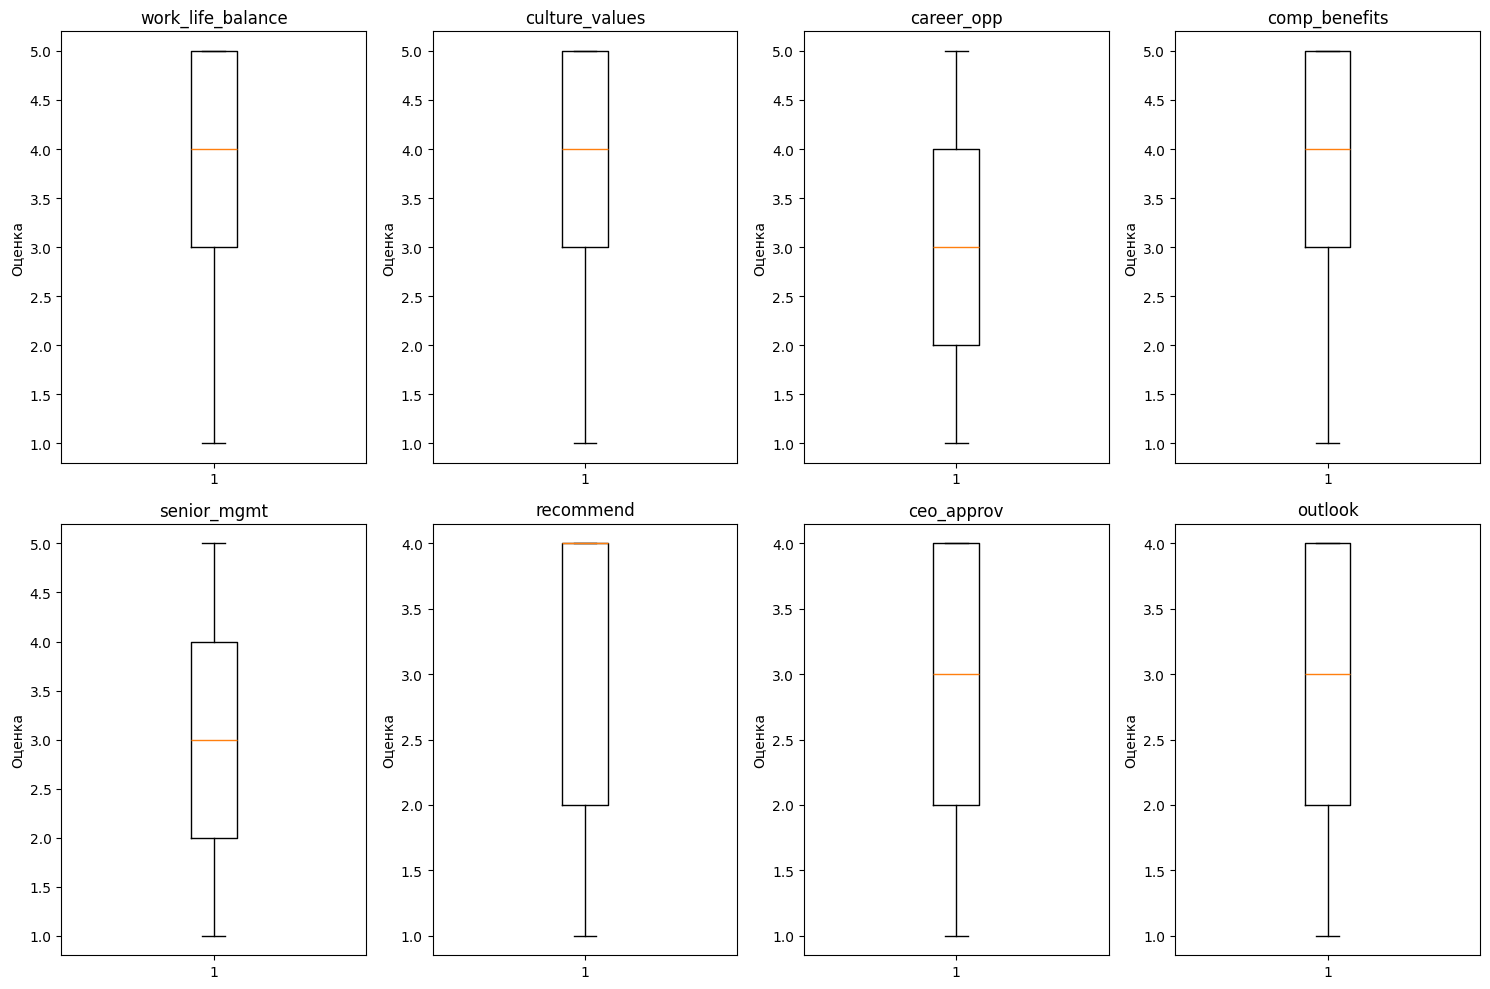

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axs = axs.flatten()

for i, col in enumerate(df.columns[:-4]):
    axs[i].boxplot(df[col])
    axs[i].set_title(col)
    axs[i].set_ylabel('Оценка')

plt.tight_layout()
plt.show()

Как мы видим по графикам, выбросов в данных нет. Нас интересует график recommend - по нему мы можем увидеть, что половина оценок - 4, то есть максимальны. career_opp и senior_mgmt имеют достаточно средние графики. Остальные же графики говорят нам о том, что эти оценки выше средних показателей.

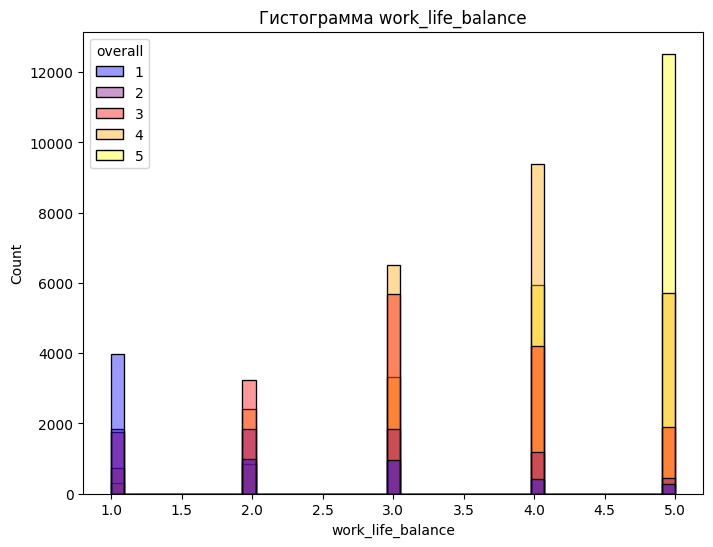

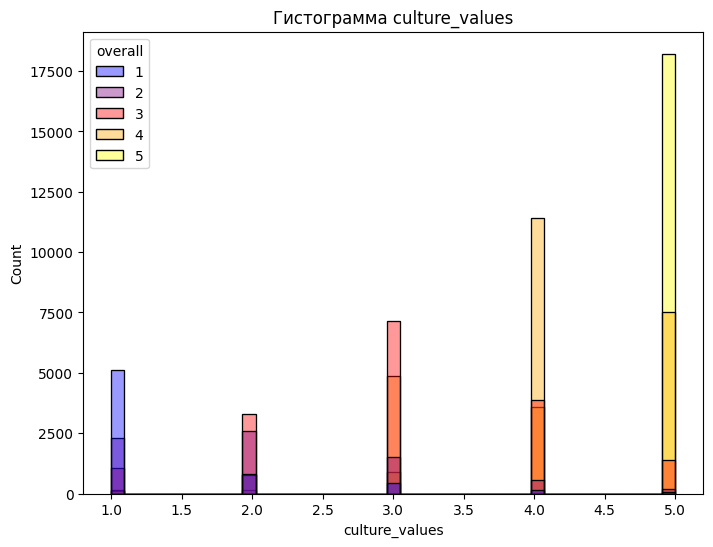

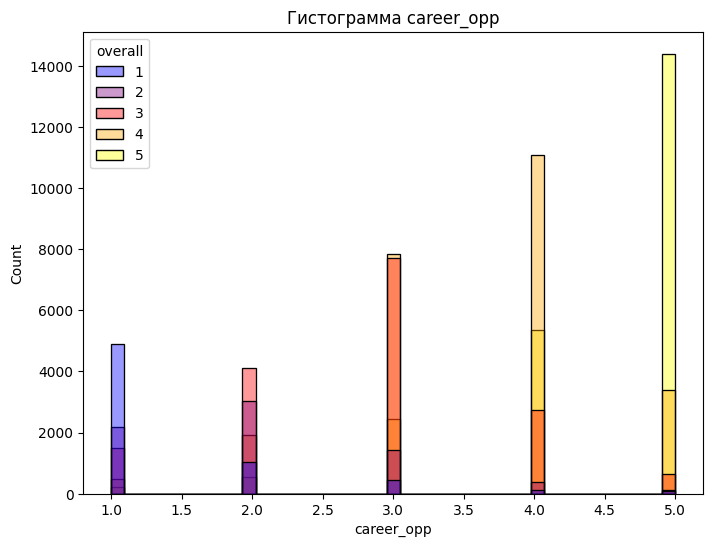

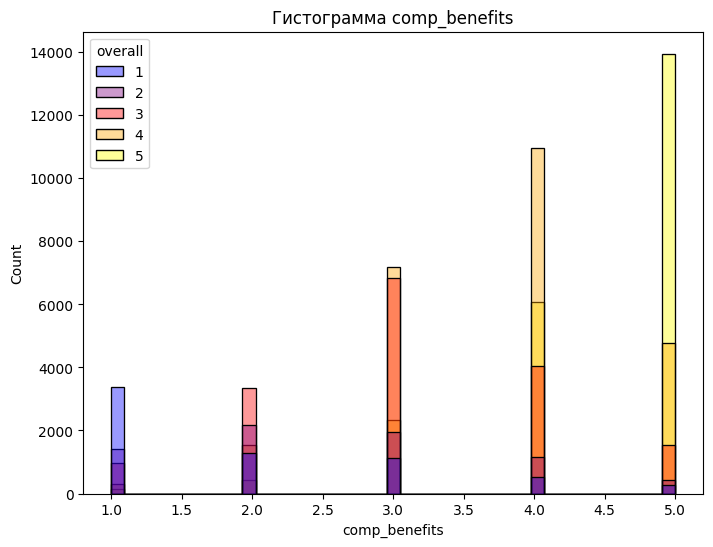

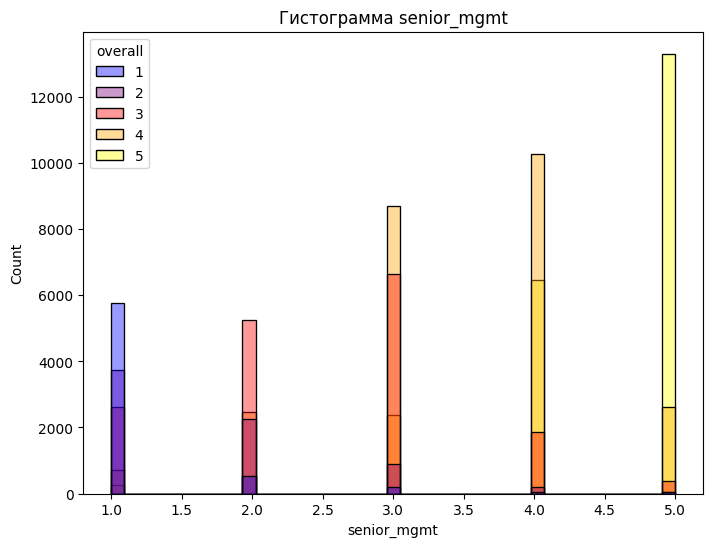

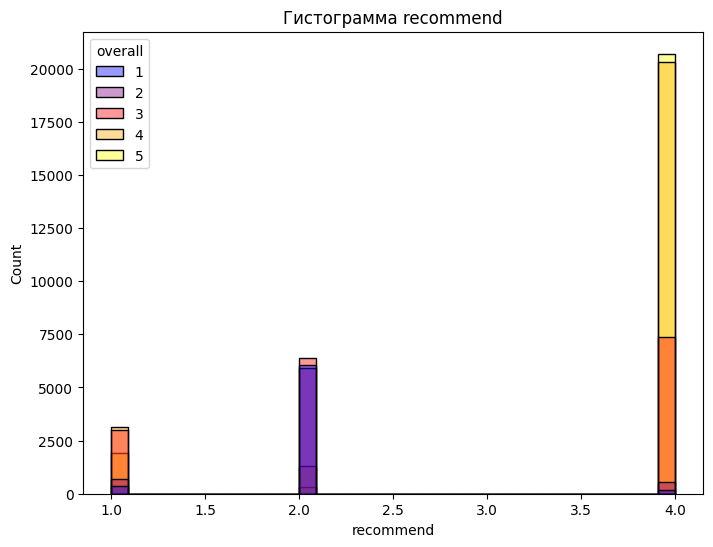

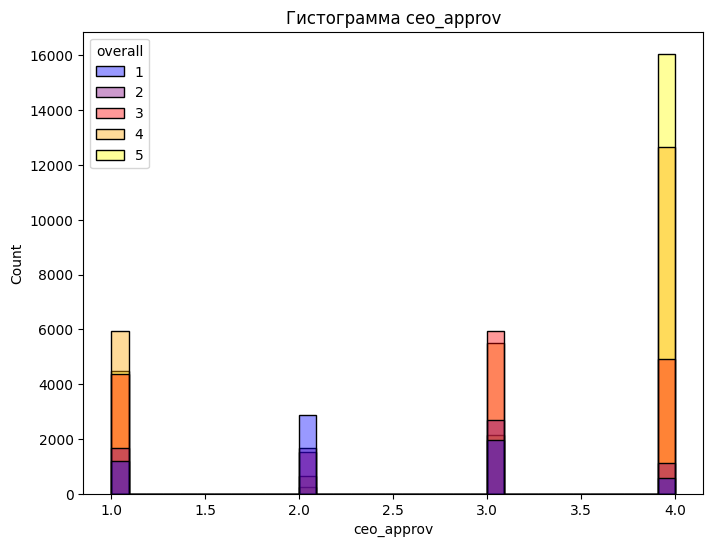

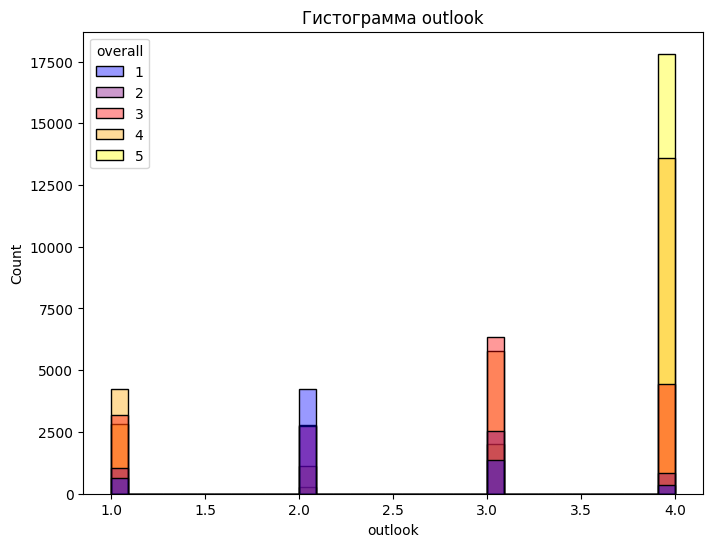

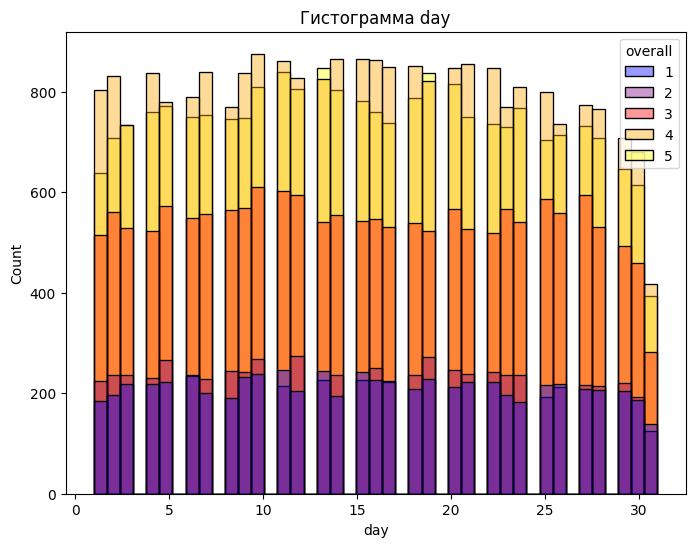

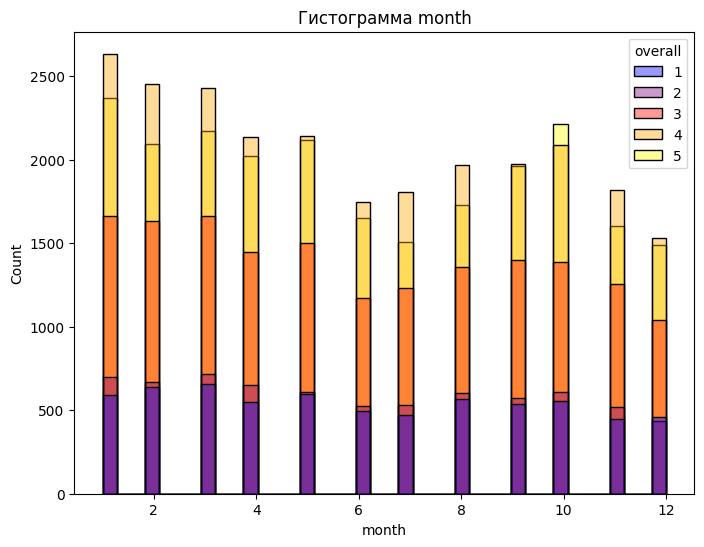

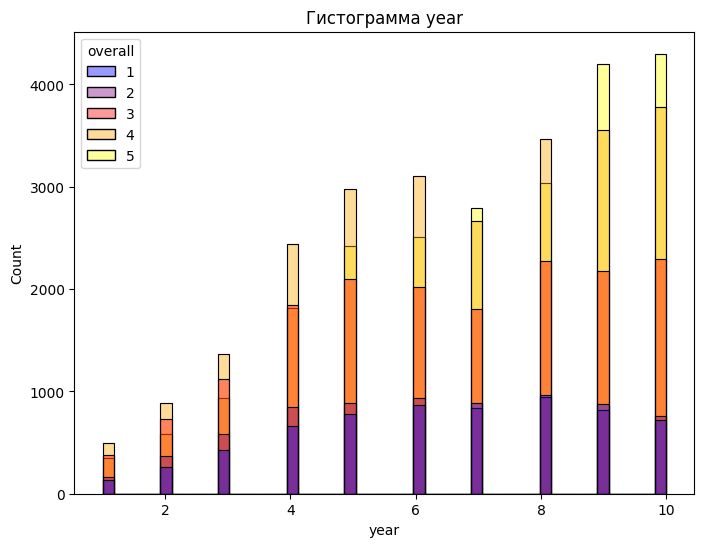

In [ ]:
for feature in ['work_life_balance',	'culture_values',	'career_opp',	'comp_benefits',	'senior_mgmt',	'recommend',	'ceo_approv',	'outlook',	'day',	'month',	'year']:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, hue='overall', kde=False, palette = ['blue', 'purple', 'red', 'orange', 'yellow'], alpha = 0.4)
    plt.title(f'Гистограмма {feature}')
    plt.show()

По этим графикам можно заметить, что:


*   с каждым годом людей остается довольными своей работой на 5 баллов становится больше, чем людей оценивших свою работу на 4. Это может свидетельствовать об улучшении условий работы на тех вакансиях, где и раньше было неплохо. Так же можно заметить, что количество людей, оценивших свою работу лишь на 1 и 2 становится примерно одинаково, а значит в местах, где все было не очень стало еще хуже. При этом в течении года мы не можем заметить какого-то прогресса.
* для многих людей не играют большой роли перспективы фирмы, даже работу в довольно перспективной фирме могут не так высоко оценить и наоборот. То же самое можно сказать про ceo_approve   
* многие люди с высокой вероятностью порекомендуют свою работу другим, хотя оценки этой должности в равной мере распределены между 4 и 5
* senior_mgmt показывает, пожалуй, самую логичную картину. То же самое, но в чуть меньшей мере можно сказать и про такие столбцы, как: work_life_balance, culture_values,	career_opp,	comp_benefits





Я решил построить такой же график но с месяцами в последние 3-4 года

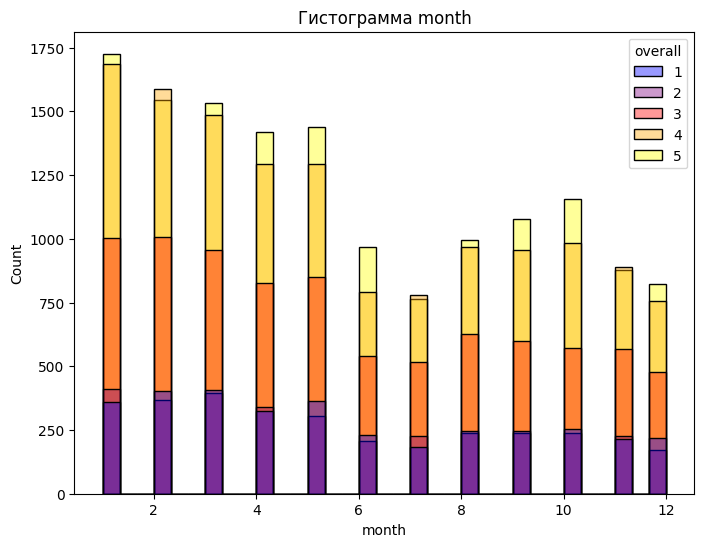

In [ ]:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df[(df['year'] >= 7) & (df['year'] <= 10)], x='month', hue='overall', kde=False, palette = ['blue', 'purple', 'red', 'orange', 'yellow'], alpha = 0.4)
    plt.title('Гистограмма month')
    plt.show()

Но и тут никакой зависимости от времени нет, значит мы подтвердили гипотезу о том, что столбцы с днем и месяцем не несут особого значения.


# Нормализация

In [ ]:
df.describe()

,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,day,month,year,overall
count,78152.000000,78152.000000,78152.000000,78152.000000,78152.000000,78152.000000,78152.000000,78152.000000,78152.000000,78152.000000,78152.000000,78152.000000
mean,3.465004,3.632255,3.355512,3.556608,3.182938,3.138051,2.912210,3.026026,15.603196,6.121609,6.716002,3.643682
std,1.296418,1.340969,1.300626,1.218550,1.363324,1.153527,1.197765,1.107191,8.654603,3.465339,2.449875,1.226604
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,8.000000,3.000000,5.000000,3.000000
50%,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,15.000000,6.000000,7.000000,4.000000
75%,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,23.000000,9.000000,9.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,31.000000,12.000000,10.000000,5.000000


тк мы видим, что отрицательных и нулевых значений нет, то можем нормализовать с помощью powertransformer и метода Box-Cox. Перед этим вычтем из столбца с годами наименьшее значение, чтобы числа были сравнимы с остальными столбцами и сработал PT

In [ ]:
df['year'] = df['year'] - df['year'].min() + 1
pt = PowerTransformer(method = 'box-cox')
new_arr = pt.fit_transform(df.drop(columns = 'overall'))
new_df = pd.DataFrame(new_arr, columns=['work_life_balance',	'culture_values',	'career_opp',	'comp_benefits',	'senior_mgmt',	'recommend',	'ceo_approv',	'outlook',	'day',	'month',	'year'])
new_df['overall'] = df['overall']
new_df

,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,day,month,year,overall
0,0.371667,-0.602106,-1.060046,-0.548583,-0.134175,-1.126001,-1.523631,-0.180489,-1.243051,-0.500995,-1.125080,2
1,-0.435397,-1.757818,-1.060046,-1.876647,0.599324,-1.126001,-1.523631,-0.180489,-0.440152,1.510099,-1.125080,2
2,-1.765328,-1.757818,-1.737748,-1.876647,-1.601212,-1.126001,-1.523631,-1.054130,1.336289,-1.702864,-0.742651,1
3,-1.157151,-0.602106,-1.060046,-1.287863,-0.134175,-1.126001,-1.523631,-0.180489,0.133422,-0.500995,-0.742651,5
4,-1.157151,-1.757818,-1.060046,-1.876647,-1.601212,-1.126001,-1.523631,-1.054130,0.857410,-0.500995,-0.742651,1
...,...,...,...,...,...,...,...,...,...,...,...,...
78147,0.371667,1.097816,-0.315610,-0.548583,-0.134175,0.762872,0.950898,-0.180489,-1.566673,-0.193836,-1.820608,4
78148,1.248749,0.189624,-1.060046,0.309266,-0.867685,-1.126001,-0.036809,-0.180489,-1.399104,-0.193836,-1.820608,2
78149,-0.435397,-1.260705,0.475768,0.309266,-0.134175,-1.126001,0.950898,-0.180489,-1.399104,-0.193836,-1.820608,3
78150,-0.435397,0.189624,-0.315610,0.309266,0.599324,0.762872,0.950898,-0.180489,-1.243051,-0.193836,-1.820608,4


In [ ]:
new_df.describe()

,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,day,month,year,overall
count,7.815200e+04,7.815200e+04,7.815200e+04,7.815200e+04,7.815200e+04,7.815200e+04,7.815200e+04,7.815200e+04,7.815200e+04,7.815200e+04,7.815200e+04,78152.000000
mean,-1.705623e-16,1.331040e-16,7.055241e-17,-4.073129e-17,-4.727739e-17,5.673286e-17,4.640457e-16,-1.731080e-16,3.951298e-16,-1.278308e-16,3.243956e-16,3.643682
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.226604
min,-1.765328e+00,-1.757818e+00,-1.737748e+00,-1.876647e+00,-1.601212e+00,-1.631301e+00,-1.523631e+00,-1.653751e+00,-1.964999e+00,-1.702864e+00,-2.117744e+00,1.000000
25%,-4.353971e-01,-6.021063e-01,-1.060046e+00,-5.485832e-01,-8.676853e-01,-1.126001e+00,-8.738161e-01,-1.054130e+00,-8.198407e-01,-8.400004e-01,-7.426515e-01,3.000000
50%,3.716673e-01,1.896241e-01,-3.156103e-01,3.092658e-01,-1.341752e-01,7.628721e-01,-3.680870e-02,-1.804888e-01,2.330366e-02,9.011690e-02,7.344475e-02,4.000000
75%,1.248749e+00,1.097816e+00,4.757679e-01,1.267658e+00,5.993238e-01,7.628721e-01,9.508982e-01,9.379142e-01,8.574097e-01,8.472178e-01,9.449225e-01,5.000000
max,1.248749e+00,1.097816e+00,1.303992e+00,1.267658e+00,1.332815e+00,7.628721e-01,9.508982e-01,9.379142e-01,1.611959e+00,1.510099e+00,1.398165e+00,5.000000


In [ ]:
new_df.to_csv('/content/drive/MyDrive/ML/glassdor_norm.csv', index = False)

# EDA после нормализации

In [ ]:
px.histogram(new_df, x = 'overall')

тут смотрели разные графики

In [ ]:
#fig1 = px.scatter_matrix(new_df.iloc[:1000], color = 'overall', opacity = 0.5)
#fig1.show()

In [ ]:
new_df.corr().style.background_gradient( vmin = -1, vmax = 1)

,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,day,month,year,overall
work_life_balance,1.000000,0.560420,0.457547,0.413762,0.557910,0.381742,0.195095,0.260284,0.000323,-0.008739,0.084692,0.568982
culture_values,0.560420,1.000000,0.643502,0.569635,0.748455,0.534354,0.319646,0.407109,0.000256,-0.002256,0.087599,0.770925
career_opp,0.457547,0.643502,1.000000,0.582057,0.686923,0.475717,0.257734,0.381295,0.004882,-0.003353,0.109498,0.729628
comp_benefits,0.413762,0.569635,0.582057,1.000000,0.556610,0.404134,0.262727,0.333848,-0.001664,0.006256,0.070104,0.625932
senior_mgmt,0.557910,0.748455,0.686923,0.556610,1.000000,0.509329,0.295450,0.408230,0.004661,-0.004049,0.097570,0.764622
recommend,0.381742,0.534354,0.475717,0.404134,0.509329,1.000000,0.491855,0.653416,0.005178,0.005019,-0.008174,0.571540
ceo_approv,0.195095,0.319646,0.257734,0.262727,0.295450,0.491855,1.000000,0.535255,-0.001006,0.012942,-0.027908,0.306459
outlook,0.260284,0.407109,0.381295,0.333848,0.408230,0.653416,0.535255,1.000000,0.002753,0.005903,0.001427,0.433672
day,0.000323,0.000256,0.004882,-0.001664,0.004661,0.005178,-0.001006,0.002753,1.000000,-0.024839,-0.013315,0.000210
month,-0.008739,-0.002256,-0.003353,0.006256,-0.004049,0.005019,0.012942,0.005903,-0.024839,1.000000,-0.232235,-0.001206


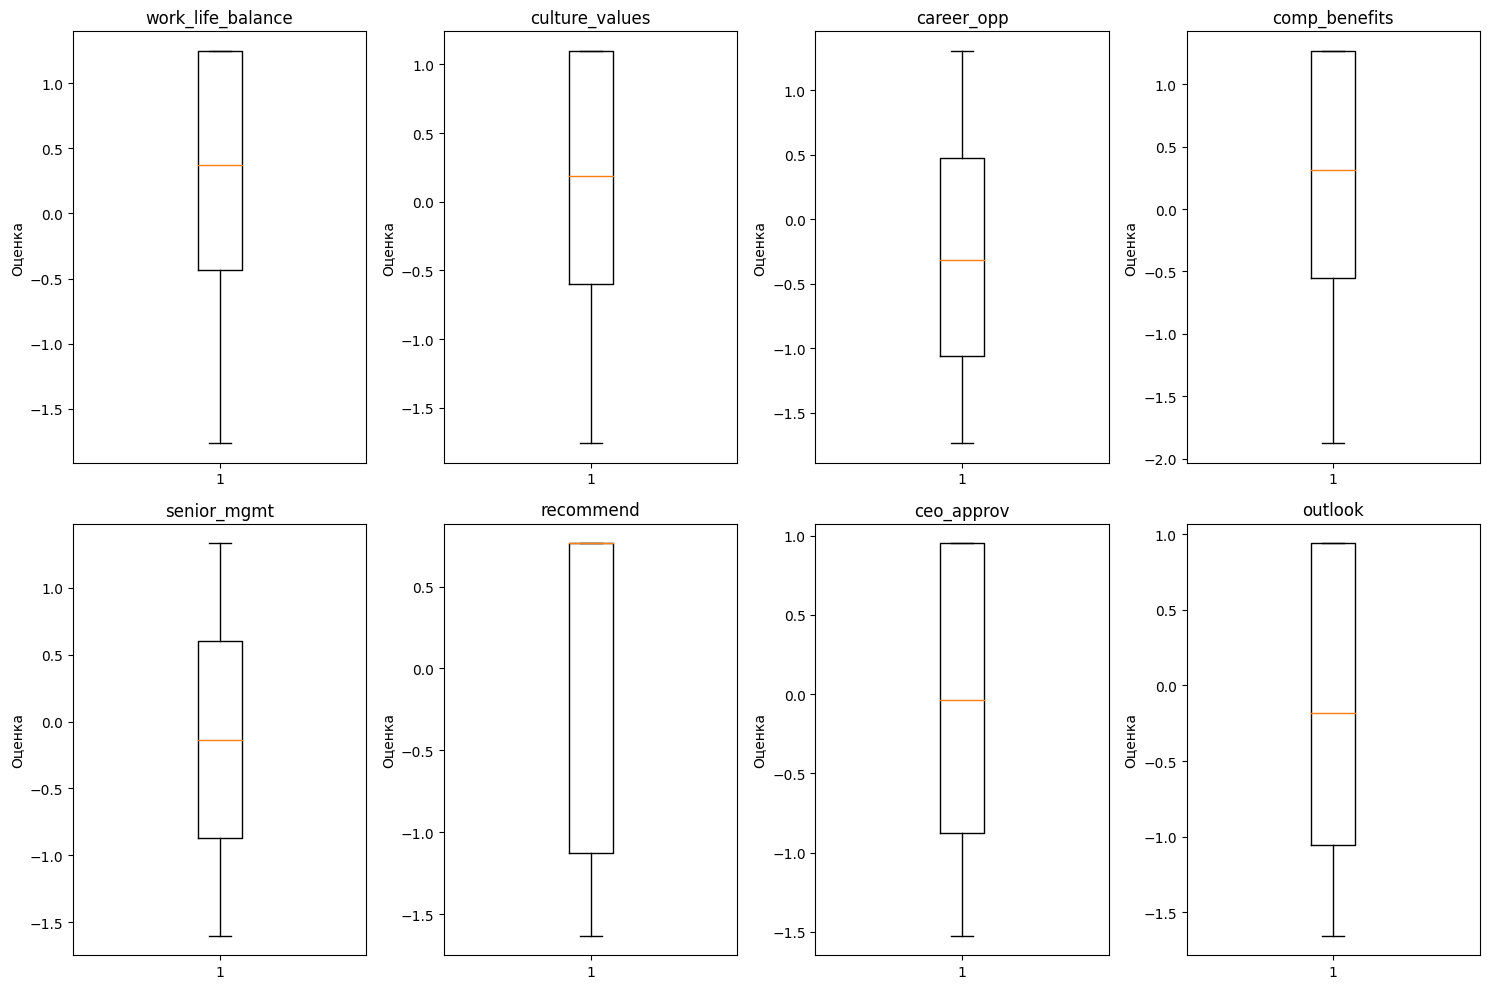

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axs = axs.flatten()

for i, col in enumerate(new_df.columns[:-4]):
    axs[i].boxplot(new_df[col])
    axs[i].set_title(col)
    axs[i].set_ylabel('Оценка')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` 

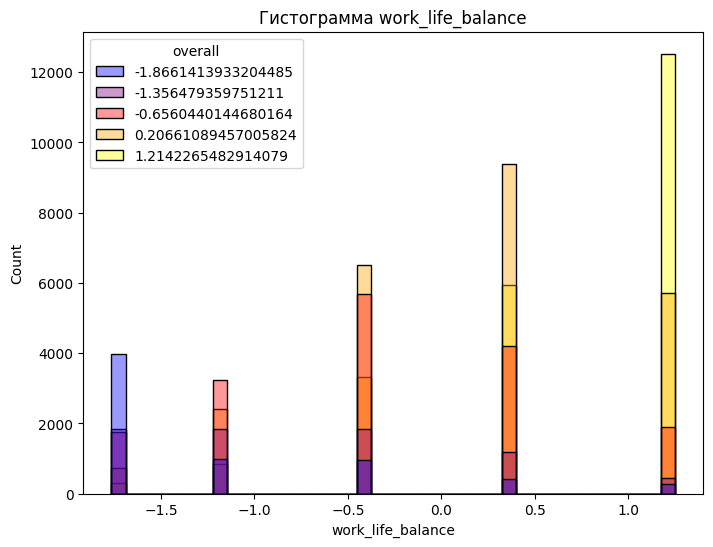

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` 

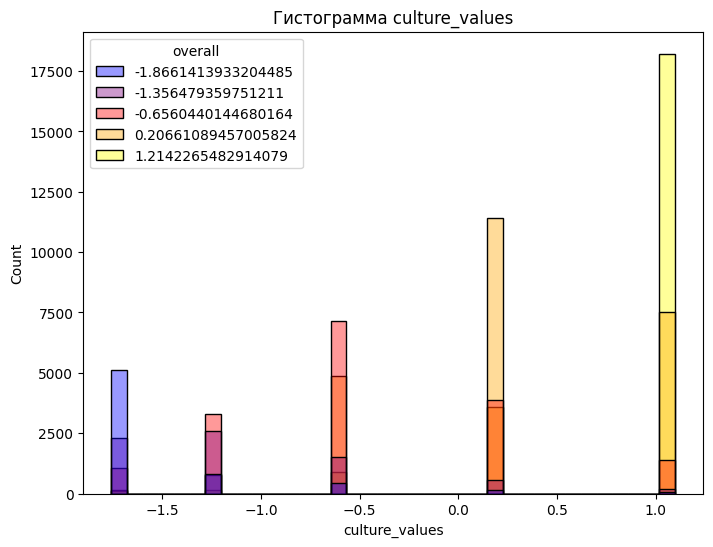

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` 

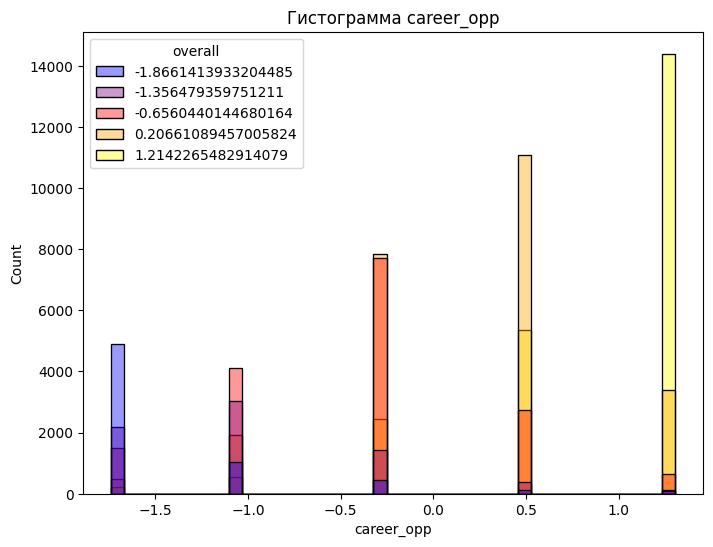

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` 

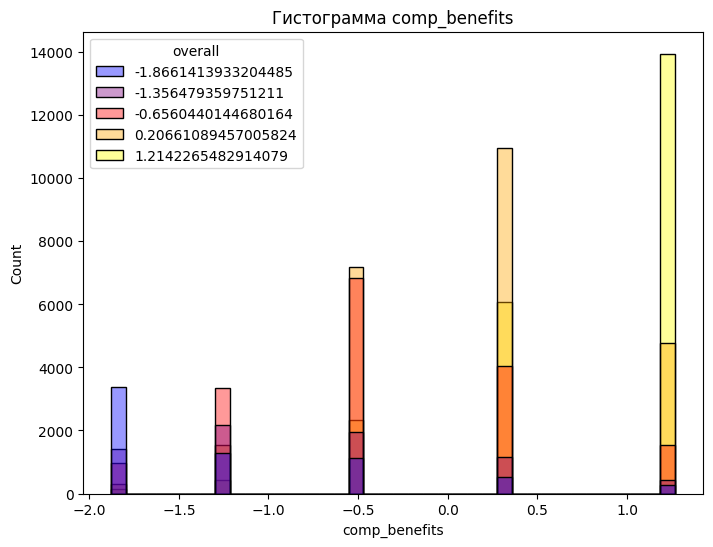

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` 

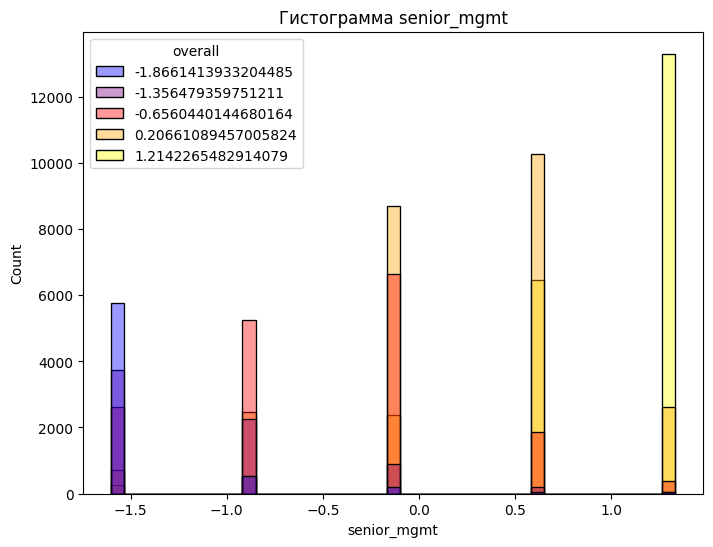

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` 

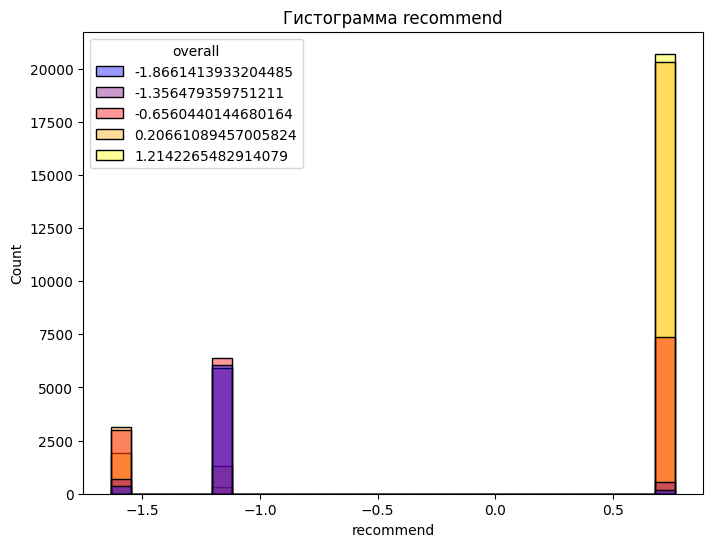

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` 

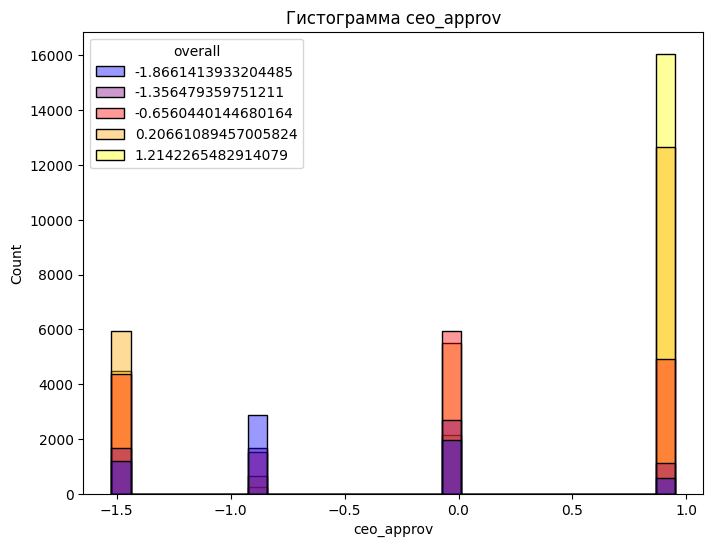

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` 

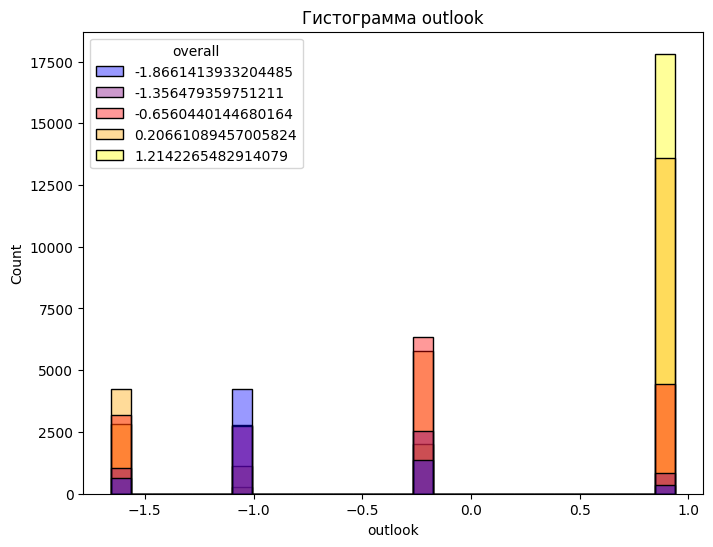

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` 

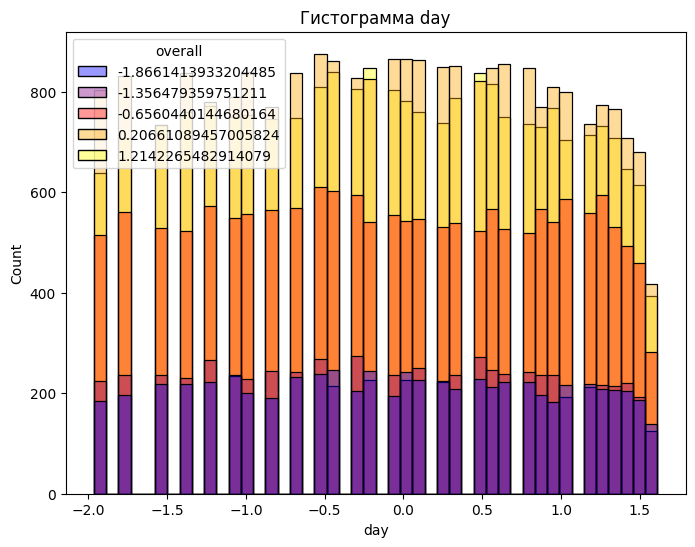

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` 

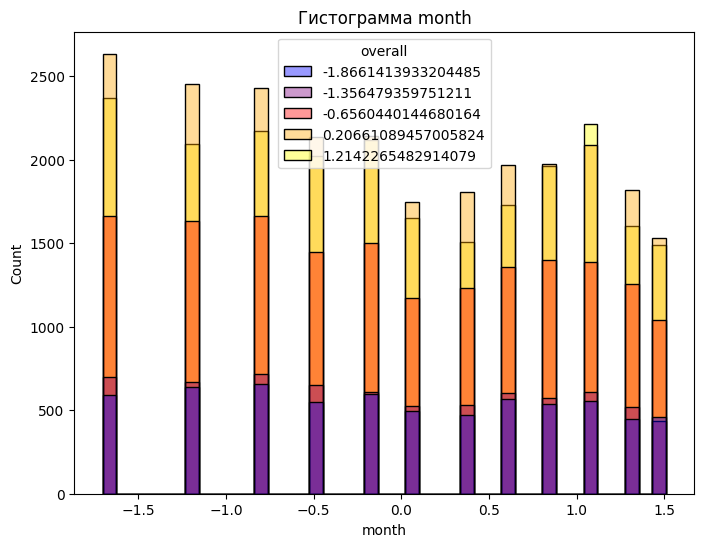

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` 

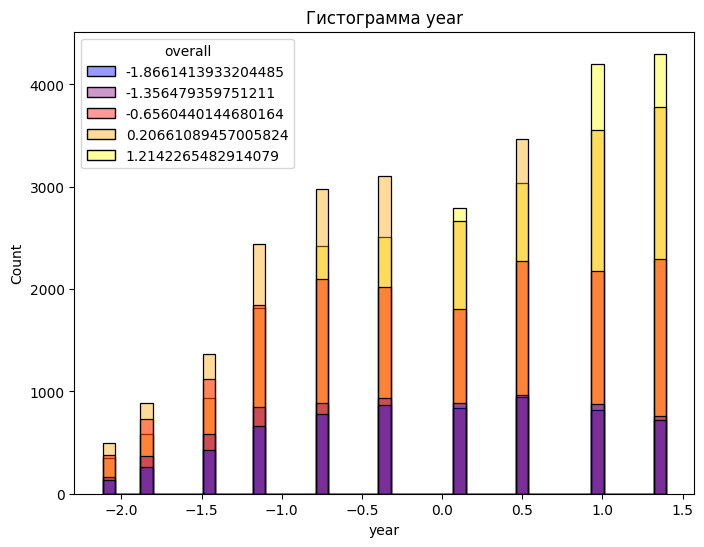

In [ ]:
for feature in ['work_life_balance',	'culture_values',	'career_opp',	'comp_benefits',	'senior_mgmt',	'recommend',	'ceo_approv',	'outlook',	'day',	'month',	'year']:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=new_df, x=feature, hue='overall', kde=False, palette = ['blue', 'purple', 'red', 'orange', 'yellow'], alpha = 0.4)
    plt.title(f'Гистограмма {feature}')
    plt.show()

На всех графиках примерно та же картина, что была до предобработки